In [15]:
import sys
import cv2
import numpy as np
from rasterio import Affine
sys.path.append('../backend/')
%load_ext autoreload
%autoreload 2
from transform.coordinates import get_affine_transform
from transform.coordinates import to_web_mercator
from extract.extract import get_coordinates
from extract.extract import read_image
from transform.geotiff import geotiff
from rasterio.shutil import copy
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
IMAGE_PATH = '../resources/us-army-1945.jpeg'

# lat / lon convention!
LANDMARKS = {
    'Kirche St. Oswald': {         
        'pixel': (286, 2125),
        'gps': (48.619095, 14.030765)
    },
    'Laher Unteruresch': {
        'pixel': (863, 2610) , 
        'gps': (48.61017854015886, 14.04406485511563) ,
                },
    'Ruine Wittinghausen': {
        'pixel': (2919, 143),
        'gps': (48.64500581431426, 14.103290101060226),
              }, 
}

In [25]:
pixel, gps = get_coordinates(LANDMARKS)
meters = to_web_mercator(gps)
A = get_affine_transform(pixel, meters)
tif = geotiff(read_image(IMAGE_PATH), A)

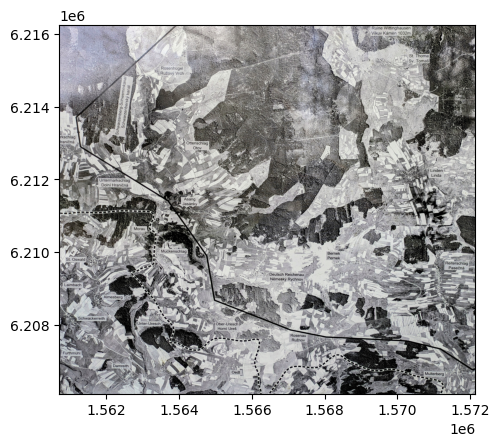

In [26]:
from rasterio.plot import show
with tif.open() as dataset:
    fig, ax = plt.subplots()
    show(dataset, ax)

In [11]:
from main import * 

In [12]:
Map(clear_directory)((STATIC_AUDIO_PATH, STATIC_TILES_PATH, STATIC_TOPOTHEK_PATH))
binary_copy_file(AUDIO_PATH, STATIC_AUDIO_PATH + '/test.mp3')
Pipe(crawl, Map(Download(STATIC_TOPOTHEK_PATH)))(EXAMPLE_TOPOTHEK_URL)
create_raster_tif()

/Users/viktor/.pyenv/versions/3.12.9/envs/time-strolls/lib/python3.12/site-packages/rio_tiler/io/rasterio.py:135: NoOverviewWarning: The dataset has no Overviews. rio-tiler performances might be impacted.
  warnings.warn(
